# Simple Linear Regression

## The Linear Model

Simple linear regression models the relationship between two variables by fitting a linear equation to the observed data. The general form of this equation is:

$$y = \beta_0 + \beta_1 x + \epsilon$$

Where:
- $y$ is the dependent variable
- $x$ is the independent variable
- $\beta_0$ is the y-intercept
- $\beta_1$ is the slope coefficient
- $\epsilon$ is the error term

## Loss Function: Mean Squared Error

The Mean Squared Error (MSE) is used to measure how well the model fits the data:

$$MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$$

Where:
- $n$ is the number of observations
- $y_i$ is the actual value
- $\hat{y}_i$ is the predicted value ($\hat{y}_i = \beta_0 + \beta_1 x_i$)

## Parameter Estimation

The optimal parameters are calculated using the Ordinary Least Squares (OLS) method:

$$\beta_1 = \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^{n} (x_i - \bar{x})^2}$$

$$\beta_0 = \bar{y} - \beta_1 \bar{x}$$

Where:
- $\bar{x}$ is the mean of the independent variable
- $\bar{y}$ is the mean of the dependent variable

## Model Evaluation

The coefficient of determination ($R^2$) measures the proportion of variance explained by the model:

$$R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}$$

The Root Mean Squared Error (RMSE) provides an absolute measure of fit:

$$RMSE = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}$$

## Implementation
Let's now implement simple linear regression using Python. We'll use a dataset that contains information about years of experience and corresponding salaries.

In [2]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import ipywidgets as widgets
from IPython.display import display, Markdown, clear_output
from matplotlib.colors import LinearSegmentedColormap

In [3]:
# Load the dataset
dataset = pd.read_csv('Data/Salary_Data.csv')
X = dataset.iloc[:, :-1].values  # Years of Experience
y = dataset.iloc[:, -1].values   # Salary

In [4]:
# Display first few rows of the dataset
print("Dataset Preview:")
print(dataset.head())

Dataset Preview:
   YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0


Now let's split our data into training and testing sets:

In [5]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=0)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")

Training set size: 20 samples
Test set size: 10 samples


Next, we'll implement the linear regression formulas manually to demonstrate how they work:

In [6]:
# Calculate manually using the formulas from the theory
def calculate_linear_regression_params(x, y):
    # Convert to 1D arrays for easier calculations
    x = x.flatten()
    y = y.flatten()
    
    # Calculate means
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    
    # Calculate beta_1 (slope)
    numerator = sum((x - x_mean) * (y - y_mean))
    denominator = sum((x - x_mean) ** 2)
    beta_1 = numerator / denominator
    
    # Calculate beta_0 (intercept)
    beta_0 = y_mean - beta_1 * x_mean
    
    return beta_0, beta_1

In [7]:
# Calculate MSE and R-squared manually
def calculate_metrics(y_true, y_pred):
    # Mean Squared Error
    mse = np.mean((y_true - y_pred) ** 2)
    
    # R-squared
    y_mean = np.mean(y_true)
    ss_total = np.sum((y_true - y_mean) ** 2)
    ss_residual = np.sum((y_true - y_pred) ** 2)
    r_squared = 1 - (ss_residual / ss_total)
    
    return mse, r_squared

In [8]:
# Calculate parameters manually
beta_0_manual, beta_1_manual = calculate_linear_regression_params(X_train, y_train)

# Make manual predictions
y_pred_manual_train = beta_0_manual + beta_1_manual * X_train.flatten()
y_pred_manual_test = beta_0_manual + beta_1_manual * X_test.flatten()

# Calculate metrics for manual predictions
mse_manual_train, r2_manual_train = calculate_metrics(y_train, y_pred_manual_train)
mse_manual_test, r2_manual_test = calculate_metrics(y_test, y_pred_manual_test)

In [9]:
print("Manual Linear Regression Results:")
print(f"Intercept (β₀): {beta_0_manual:.2f}")
print(f"Coefficient (β₁): {beta_1_manual:.2f}")
print(f"Mean Squared Error (Training): {mse_manual_train:.2f}")
print(f"R² Score (Training): {r2_manual_train:.4f}")
print(f"Mean Squared Error (Test): {mse_manual_test:.2f}")
print(f"R² Score (Test): {r2_manual_test:.4f}")

Manual Linear Regression Results:
Intercept (β₀): 26816.19
Coefficient (β₁): 9345.94
Mean Squared Error (Training): 36852948.76
R² Score (Training): 0.9382
Mean Squared Error (Test): 21026037.33
R² Score (Test): 0.9749


Now let's use scikit-learn to train a linear regression model:

In [10]:
# Create and train the linear regression model using scikit-learn
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [11]:
# Make predictions
y_pred_train = regressor.predict(X_train)
y_pred_test = regressor.predict(X_test)

In [12]:
# Calculate metrics
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

In [13]:
# Compare with manual calculation
print("\nScikit-learn Linear Regression Results:")
print(f"Intercept (β₀): {regressor.intercept_:.2f}")
print(f"Coefficient (β₁): {regressor.coef_[0]:.2f}")
print(f"Mean Squared Error (Training): {mse_train:.2f}")
print(f"R² Score (Training): {r2_train:.4f}")
print(f"Mean Squared Error (Test): {mse_test:.2f}")
print(f"R² Score (Test): {r2_test:.4f}")


Scikit-learn Linear Regression Results:
Intercept (β₀): 26816.19
Coefficient (β₁): 9345.94
Mean Squared Error (Training): 36852948.76
R² Score (Training): 0.9382
Mean Squared Error (Test): 21026037.33
R² Score (Test): 0.9749


Comparing both Manualand Scikit-Learn outputs:

In [14]:
print("\nComparison of Manual vs. Scikit-learn:")
print(f"Manual β₀: {beta_0_manual:.2f} vs. Scikit-learn β₀: {regressor.intercept_:.2f}")
print(f"Manual β₁: {beta_1_manual:.2f} vs. Scikit-learn β₁: {regressor.coef_[0]:.2f}")


Comparison of Manual vs. Scikit-learn:
Manual β₀: 26816.19 vs. Scikit-learn β₀: 26816.19
Manual β₁: 9345.94 vs. Scikit-learn β₁: 9345.94


Let's visualize the training set results:

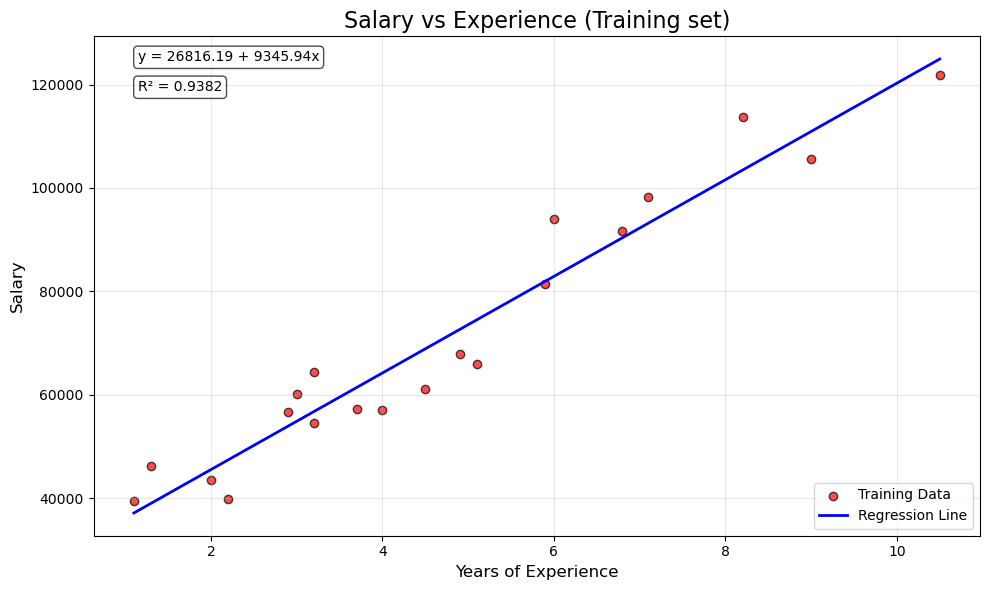

In [15]:
# Visualizing the Training set results
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='red', alpha=0.7, edgecolors='black', label='Training Data')

# Plot the regression line
x_line = np.linspace(X_train.min(), X_train.max(), 100).reshape(-1, 1)
y_line = regressor.predict(x_line)
plt.plot(x_line, y_line, color='blue', linewidth=2, label='Regression Line')

# Customize the plot
plt.title('Salary vs Experience (Training set)', fontsize=16)
plt.xlabel('Years of Experience', fontsize=12)
plt.ylabel('Salary', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend()

# Add formula and R² text
formula_text = f'y = {beta_0_manual:.2f} + {beta_1_manual:.2f}x'
r2_text = f'R² = {r2_train:.4f}'
plt.annotate(formula_text, xy=(0.05, 0.95), xycoords='axes fraction', 
             fontsize=10, bbox=dict(boxstyle="round,pad=0.3", fc="white", alpha=0.7))
plt.annotate(r2_text, xy=(0.05, 0.89), xycoords='axes fraction', 
             fontsize=10, bbox=dict(boxstyle="round,pad=0.3", fc="white", alpha=0.7))

plt.tight_layout()
plt.show()

Now, let's visualize the test set results:

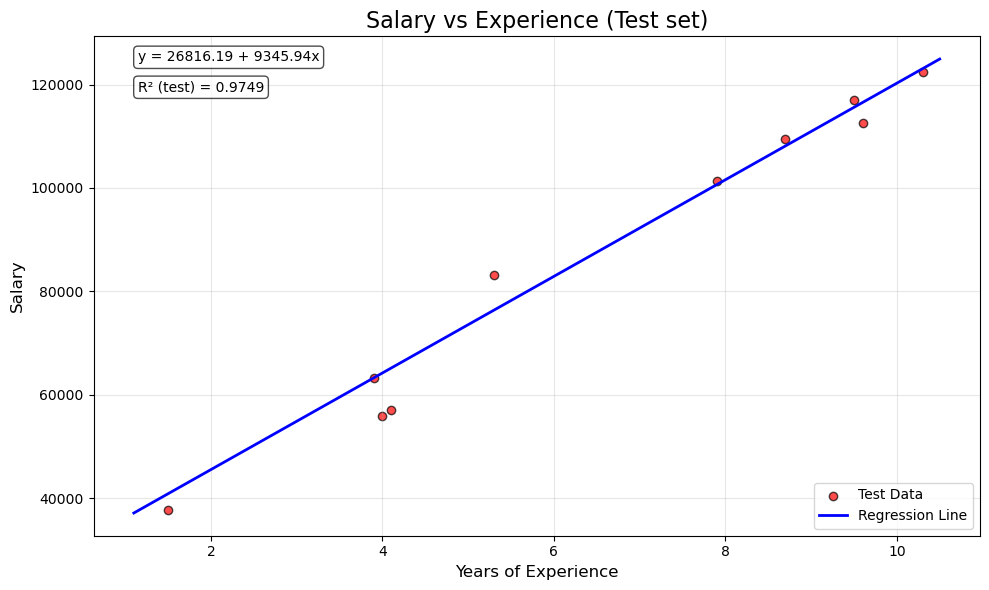

In [16]:
# Visualizing the Test set results
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='red', alpha=0.7, edgecolors='black', label='Test Data')

# Plot the regression line (same line as training)
plt.plot(x_line, y_line, color='blue', linewidth=2, label='Regression Line')

# Customize the plot
plt.title('Salary vs Experience (Test set)', fontsize=16)
plt.xlabel('Years of Experience', fontsize=12)
plt.ylabel('Salary', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend()

# Add formula and R² text
formula_text = f'y = {beta_0_manual:.2f} + {beta_1_manual:.2f}x'
r2_text = f'R² (test) = {r2_test:.4f}'
plt.annotate(formula_text, xy=(0.05, 0.95), xycoords='axes fraction', 
             fontsize=10, bbox=dict(boxstyle="round,pad=0.3", fc="white", alpha=0.7))
plt.annotate(r2_text, xy=(0.05, 0.89), xycoords='axes fraction', 
             fontsize=10, bbox=dict(boxstyle="round,pad=0.3", fc="white", alpha=0.7))

plt.tight_layout()
plt.show()

Finally, let's create an interactive cell that allows us to predict salary based on custom input:

In [17]:
# Create a custom input cell to get prediction for user-provided experience value
def predict_salary(years_of_experience):
    """Predict salary based on years of experience using the trained model"""
    if years_of_experience < 0:
        return "Years of experience cannot be negative."
    
    # Format input for prediction (needs to be 2D array for sklearn)
    input_data = np.array([[years_of_experience]])
    
    # Make prediction
    predicted_salary = regressor.predict(input_data)[0]
    
    # Calculate the prediction manually using the formula
    manual_prediction = beta_0_manual + beta_1_manual * years_of_experience
    
    # Create report
    report = f"""
    Salary Prediction Results
    
    * Input: {years_of_experience} years of experience
    
    * Predicted Salary (Model): ${predicted_salary:.2f}
    
    * Predicted Salary (Manual Formula): ${manual_prediction:.2f}
    
    * Formula Used: Salary = {beta_0_manual:.2f} + {beta_1_manual:.2f} × Years
    
    * Model Accuracy: R² = {r2_test:.4f}
    """
    
    # Display prediction visualization
    plt.figure(figsize=(10, 6))
    
    # Plot all data points
    plt.scatter(X_train, y_train, color='blue', alpha=0.5, edgecolors='none', label='Training Data')
    plt.scatter(X_test, y_test, color='green', alpha=0.5, edgecolors='none', label='Test Data')
    
    # Plot the regression line
    plt.plot(x_line, y_line, color='red', linewidth=2, label='Regression Line')
    
    # Highlight the prediction point
    plt.scatter([years_of_experience], [predicted_salary], color='red', s=100, marker='*', 
                edgecolors='black', linewidth=1.5, label='Your Prediction')
    
    # Add vertical line to show the prediction
    plt.vlines(years_of_experience, 0, predicted_salary, color='black', linestyle='--', alpha=0.5)
    plt.hlines(predicted_salary, 0, years_of_experience, color='black', linestyle='--', alpha=0.5)
    
    # Customize the plot
    plt.title('Salary Prediction Based on Experience', fontsize=16)
    plt.xlabel('Years of Experience', fontsize=12)
    plt.ylabel('Salary', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.legend(loc='upper left')
    
    # Add prediction annotation
    pred_text = f'Predicted: ${predicted_salary:.2f}'
    plt.annotate(pred_text, xy=(years_of_experience, predicted_salary), 
                 xytext=(10, -20), textcoords='offset points',
                 fontsize=10, bbox=dict(boxstyle="round,pad=0.3", fc="white", alpha=0.7),
                 arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))
    
    plt.tight_layout()
    plt.show()
    
    # Display markdown report
    display(Markdown(report))

# Create a simple user interface
experience_input = widgets.FloatText(
    value=5.0,
    description='Years of Experience:',
    min=0,
    max=50,
    step=0.5
)

predict_button = widgets.Button(
    description='Predict Salary',
    button_style='success',
    tooltip='Click to predict salary'
)

output = widgets.Output()

def on_button_click(b):
    with output:
        clear_output()
        predict_salary(experience_input.value)

predict_button.on_click(on_button_click)

# Display the widgets
print("Enter years of experience to predict salary:")
display(experience_input)
display(predict_button)
display(output)

# Initialize with default value
with output:
    predict_salary(5.0)

Enter years of experience to predict salary:


FloatText(value=5.0, description='Years of Experience:', step=0.5)

Button(button_style='success', description='Predict Salary', style=ButtonStyle(), tooltip='Click to predict sa…

Output()

## Conclusion
In this tutorial, we have:

- Explored the theory behind simple linear regression
- Implemented the formulas manually to understand how they work
- Used scikit-learn to build a linear regression model
- Visualized the results using Matplotlib
- Created an interactive prediction tool

Key takeaways:

- Simple linear regression finds the best-fitting line through the data points
- The line is defined by the equation $y = \beta_0 + \beta_1 x$
- We use Mean Squared Error (MSE) as a loss function to optimize the parameters
- R² tells us how well our model explains the variance in the data
- Both manual implementation and scikit-learn give us the same results